<a href="https://colab.research.google.com/github/AlbertoMartinezS/idal_ia3/blob/main/ProyectoBBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
COLAB = True

In [4]:
if COLAB:
    #%tensorflow_version 1.x
    !pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 8.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [5]:
from keras.models import Sequential, load_model, Model
from keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,
                          BatchNormalization, GlobalAveragePooling2D)
from keras import backend as K
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras import models
from IPython.display import SVG, clear_output
from keras.utils.vis_utils import model_to_dot

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob

%matplotlib inline

In [6]:
"""
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG, display, clear_output
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline
"""

'\nfrom keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array\nfrom keras.models import Sequential, load_model, Model\nfrom keras.layers import Conv2D, MaxPooling2D\nfrom keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D\nfrom keras import backend as K\nfrom keras.callbacks import ModelCheckpoint\nfrom keras import regularizers\nfrom glob import glob\n\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfrom IPython.display import SVG, display, clear_output\nfrom keras.utils.vis_utils import model_to_dot\n\nfrom sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc\n\n%matplotlib inline\n'

In [7]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1XmP_0PKqPd9m96Yzvw9x66yr75GcRwBr',
                                        dest_path='./train.zip', unzip=True)
    gdd.download_file_from_google_drive(file_id='1wEqzhD7O-XHWaRjj0Gj3RrPnB0aFr8iV',
                                        dest_path='./test.zip', unzip=True)
    



Unzipping...Done.
Unzipping...Done.


In [8]:
!ls

sample_data  test  test.zip  train  train.zip


In [9]:
!ls train/bio

bio0000_frame0000001.jpg  bio0002_frame0000564.jpg  bio0014_frame0000137.jpg
bio0000_frame0000002.jpg  bio0002_frame0000567.jpg  bio0014_frame0000143.jpg
bio0000_frame0000004.jpg  bio0002_frame0000570.jpg  bio0014_frame0000148.jpg
bio0000_frame0000006.jpg  bio0002_frame0000576.jpg  bio0014_frame0000158.jpg
bio0000_frame0000008.jpg  bio0002_frame0000579.jpg  bio0014_frame0000163.jpg
bio0000_frame0000010.jpg  bio0002_frame0000582.jpg  bio0014_frame0000168.jpg
bio0000_frame0000012.jpg  bio0002_frame0000585.jpg  bio0014_frame0000173.jpg
bio0000_frame0000014.jpg  bio0002_frame0000588.jpg  bio0014_frame0000178.jpg
bio0000_frame0000017.jpg  bio0002_frame0000591.jpg  bio0014_frame0000183.jpg
bio0000_frame0000019.jpg  bio0002_frame0000594.jpg  bio0014_frame0000188.jpg
bio0000_frame0000021.jpg  bio0002_frame0000597.jpg  bio0014_frame0000193.jpg
bio0000_frame0000023.jpg  bio0002_frame0000600.jpg  bio0014_frame0000199.jpg
bio0000_frame0000025.jpg  bio0002_frame0000603.jpg  bio0014_frame0000206.jpg

In [10]:
!ls train/obj/

obj0000_frame0000001.jpg  obj0340_frame0000020.jpg  obj1502_frame0000276.jpg
obj0000_frame0000002.jpg  obj0340_frame0000021.jpg  obj1502_frame0000278.jpg
obj0000_frame0000003.jpg  obj0340_frame0000022.jpg  obj1502_frame0000279.jpg
obj0000_frame0000006.jpg  obj0340_frame0000023.jpg  obj1502_frame0000281.jpg
obj0000_frame0000007.jpg  obj0340_frame0000025.jpg  obj1502_frame0000283.jpg
obj0000_frame0000009.jpg  obj0340_frame0000026.jpg  obj1502_frame0000284.jpg
obj0000_frame0000011.jpg  obj0340_frame0000027.jpg  obj1502_frame0000286.jpg
obj0000_frame0000013.jpg  obj0340_frame0000028.jpg  obj1502_frame0000287.jpg
obj0000_frame0000014.jpg  obj0340_frame0000029.jpg  obj1502_frame0000288.jpg
obj0000_frame0000015.jpg  obj0340_frame0000030.jpg  obj1502_frame0000289.jpg
obj0000_frame0000016.jpg  obj0340_frame0000031.jpg  obj1502_frame0000290.jpg
obj0000_frame0000017.jpg  obj0343_frame0000014.jpg  obj1502_frame0000291.jpg
obj0000_frame0000018.jpg  obj0343_frame0000015.jpg  obj1502_frame0000292.jpg

In [11]:
!ls test/obj/

obj0000_frame0000004.jpg  obj0333_frame0000102.jpg  obj1502_frame0000228.jpg
obj0000_frame0000005.jpg  obj0333_frame0000107.jpg  obj1502_frame0000235.jpg
obj0000_frame0000008.jpg  obj0334_frame0000005.jpg  obj1502_frame0000245.jpg
obj0000_frame0000010.jpg  obj0334_frame0000008.jpg  obj1502_frame0000260.jpg
obj0000_frame0000012.jpg  obj0334_frame0000010.jpg  obj1502_frame0000269.jpg
obj0000_frame0000021.jpg  obj0334_frame0000011.jpg  obj1502_frame0000274.jpg
obj0000_frame0000032.jpg  obj0334_frame0000020.jpg  obj1502_frame0000275.jpg
obj0000_frame0000033.jpg  obj0334_frame0000025.jpg  obj1502_frame0000277.jpg
obj0002_frame0000007.jpg  obj0334_frame0000030.jpg  obj1502_frame0000280.jpg
obj0002_frame0000008.jpg  obj0334_frame0000046.jpg  obj1502_frame0000282.jpg
obj0002_frame0000011.jpg  obj0334_frame0000060.jpg  obj1502_frame0000285.jpg
obj0002_frame0000014.jpg  obj0334_frame0000070.jpg  obj1502_frame0000301.jpg
obj0002_frame0000018.jpg  obj0337_frame0000008.jpg  obj1502_frame0000303.jpg

In [12]:
!ls test/bio/

bio0000_frame0000016.jpg  bio0002_frame0000501.jpg  bio0013_frame0000224.jpg
bio0000_frame0000041.jpg  bio0002_frame0000507.jpg  bio0013_frame0000242.jpg
bio0000_frame0000043.jpg  bio0002_frame0000543.jpg  bio0014_frame0000122.jpg
bio0000_frame0000073.jpg  bio0002_frame0000573.jpg  bio0014_frame0000132.jpg
bio0000_frame0000077.jpg  bio0002_frame0000606.jpg  bio0014_frame0000153.jpg
bio0000_frame0000101.jpg  bio0002_frame0000639.jpg  bio0014_frame0000239.jpg
bio0000_frame0000113.jpg  bio0002_frame0000654.jpg  bio0014_frame0000261.jpg
bio0000_frame0000115.jpg  bio0002_frame0000669.jpg  bio0014_frame0000277.jpg
bio0000_frame0000123.jpg  bio0002_frame0000684.jpg  bio0014_frame0000298.jpg
bio0000_frame0000127.jpg  bio0003_frame0000022.jpg  bio0014_frame0000303.jpg
bio0000_frame0000157.jpg  bio0003_frame0000056.jpg  bio0015_frame0000087.jpg
bio0000_frame0000165.jpg  bio0003_frame0000086.jpg  bio0015_frame0000127.jpg
bio0000_frame0000169.jpg  bio0003_frame0000119.jpg  bio0015_frame0000142.jpg

In [13]:
ficheros = glob("./train/bio/*")
ficheros[0]

'./train/bio/bio0015_frame0000735.jpg'

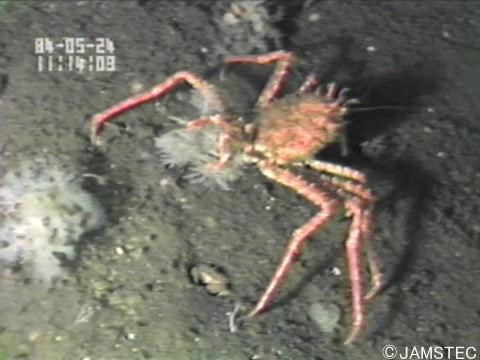

In [14]:
imagen = load_img(ficheros[152])
imagen

In [15]:
aux1 = "./train/bio/*"
aux2 = "./train/obj/*"

ficheros_train_BIO    = glob(aux1)
ficheros_train_OBJETO = glob(aux2)
ficheros_trainval = ficheros_train_BIO + ficheros_train_OBJETO
y_trainval = len(ficheros_train_BIO)*["bio"] + len(ficheros_train_OBJETO)*["obj"]

aux1 = "./test/bio/*"
aux2 = "./test/obj/*"
ficheros_test_BIO    = glob(aux1)
ficheros_test_OBJETO = glob(aux2)
ficheros_test = ficheros_test_BIO + ficheros_test_OBJETO
y_test = len(ficheros_test_BIO)*["bio"] + len(ficheros_test_OBJETO)*["obj"]

In [16]:
df_trainval = pd.DataFrame({"filepath":ficheros_trainval, "class":y_trainval})
df_test     = pd.DataFrame({"filepath":ficheros_test, "class":y_test})
df_trainval

,filepath,class
0,./train/bio/bio0015_frame0000735.jpg,bio
1,./train/bio/bio0004_frame0000026.jpg,bio
2,./train/bio/bio0016_frame0000092.jpg,bio
3,./train/bio/bio0015_frame0000378.jpg,bio
4,./train/bio/bio0000_frame0000071.jpg,bio
...,...,...
5715,./train/obj/obj0309_frame0000138.jpg,obj
5716,./train/obj/obj0871_frame0000108.jpg,obj
5717,./train/obj/obj1626_frame0000040.jpg,obj
5718,./train/obj/obj1505_frame0000328.jpg,obj


In [17]:
df_test

,filepath,class
0,./test/bio/bio0002_frame0000152.jpg,bio
1,./test/bio/bio0000_frame0000212.jpg,bio
2,./test/bio/bio0001_frame0000332.jpg,bio
3,./test/bio/bio0004_frame0000069.jpg,bio
4,./test/bio/bio0001_frame0000464.jpg,bio
...,...,...
1139,./test/obj/obj1505_frame0000144.jpg,obj
1140,./test/obj/obj1006_frame0000126.jpg,obj
1141,./test/obj/obj0818_frame0000027.jpg,obj
1142,./test/obj/obj1655_frame0000135.jpg,obj


In [18]:

df_train, df_val = train_test_split(df_trainval, test_size=0.2, random_state=0,
                                    stratify=df_trainval["class"])

In [19]:
len(df_train), len(df_val), len(df_test)

(4576, 1144, 1144)

(480, 360)


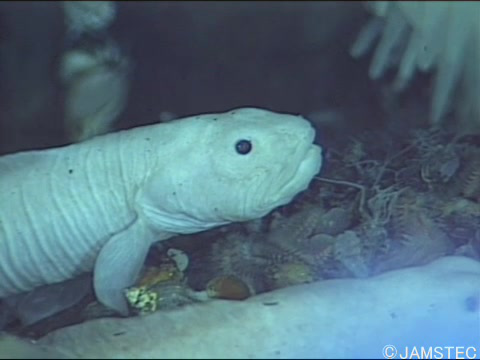

In [20]:
imagen = load_img(ficheros_trainval[8])
print(imagen.size)
imagen

In [21]:
ficheros_trainval

['./train/bio/bio0015_frame0000735.jpg',
 './train/bio/bio0004_frame0000026.jpg',
 './train/bio/bio0016_frame0000092.jpg',
 './train/bio/bio0015_frame0000378.jpg',
 './train/bio/bio0000_frame0000071.jpg',
 './train/bio/bio0016_frame0000492.jpg',
 './train/bio/bio0012_frame0000150.jpg',
 './train/bio/bio0004_frame0000325.jpg',
 './train/bio/bio0015_frame0000484.jpg',
 './train/bio/bio0016_frame0000049.jpg',
 './train/bio/bio0001_frame0000009.jpg',
 './train/bio/bio0000_frame0000260.jpg',
 './train/bio/bio0000_frame0000105.jpg',
 './train/bio/bio0015_frame0000591.jpg',
 './train/bio/bio0002_frame0000330.jpg',
 './train/bio/bio0015_frame0000004.jpg',
 './train/bio/bio0011_frame0000339.jpg',
 './train/bio/bio0016_frame0000391.jpg',
 './train/bio/bio0001_frame0000163.jpg',
 './train/bio/bio0016_frame0000349.jpg',
 './train/bio/bio0000_frame0000121.jpg',
 './train/bio/bio0001_frame0000167.jpg',
 './train/bio/bio0016_frame0000353.jpg',
 './train/bio/bio0004_frame0000268.jpg',
 './train/bio/bi

In [22]:
aux = np.array(imagen)
aux.shape

(360, 480, 3)

In [23]:
def preprocesado(x):
    # cambio axis=2 por axis=-1, ya que cuando keras llame a esta función no va a introducir
    # una sola imagen sino varias, por lo que va a haber 4 índices:
    # n ejemplos x n filas en imagen x n columnas en imagen x n canales color (3)
    # el -1 indica "último índice"
    return np.expand_dims(np.mean(x, axis=-1), -1) / 255

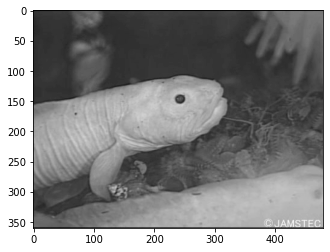

In [24]:
plt.imshow(preprocesado(aux)[:,:,0], cmap="gray");

In [25]:
df_train.iloc[3]

filepath    ./train/obj/obj1502_frame0000255.jpg
class                                        obj
Name: 3853, dtype: object

filepath    ./train/obj/obj1076_frame0000004.jpg
class                                        obj
Name: 5358, dtype: object


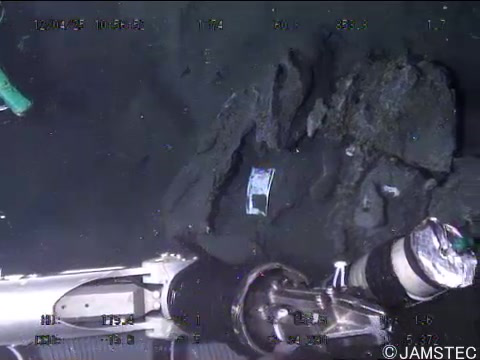

In [26]:
fich = df_train.iloc[2]["filepath"]
print(df_train.iloc[2])
imagen = load_img(fich)
display(imagen)

filepath    ./train/bio/bio0018_frame0000162.jpg
class                                        bio
Name: 170, dtype: object


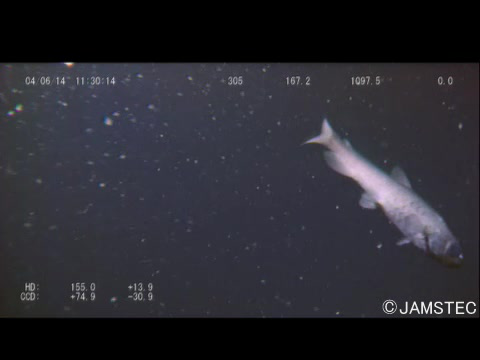

In [27]:
fich = df_train.iloc[100]["filepath"]
print(df_train.iloc[100])
imagen = load_img(fich)
display(imagen)

In [28]:
df_train["class"].value_counts() / len(df_train)

obj    0.75
bio    0.25
Name: class, dtype: float64

In [29]:
df_test["class"].value_counts() / len(df_test)

obj    0.762238
bio    0.237762
Name: class, dtype: float64

In [30]:
test_data_dir = 'test'

In [31]:
normed_dims = (150,150)
batch_size = 64

In [32]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function = preprocesado,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='mirror',
    shear_range=0.1,
    zoom_range=0.2)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

test_datagen = ImageDataGenerator(dtype='float32',
                                  preprocessing_function = preprocesado)

In [33]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    color_mode="rgb",
    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col = "filepath",
    y_col = "class",
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    color_mode="rgb",
    class_mode='categorical')

Found 4576 validated image filenames belonging to 2 classes.
Found 1144 validated image filenames belonging to 2 classes.
Found 1144 validated image filenames belonging to 2 classes.


In [34]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=normed_dims+(3,)))
model.add(Conv2D(32, (5,5), activation='relu'))
                 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (5,5), activation='relu'))
model.add(Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer="l2")) 
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 142, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 67, 67, 32)        25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                    

In [35]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [36]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

In [37]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(4576, 1144, 1144)

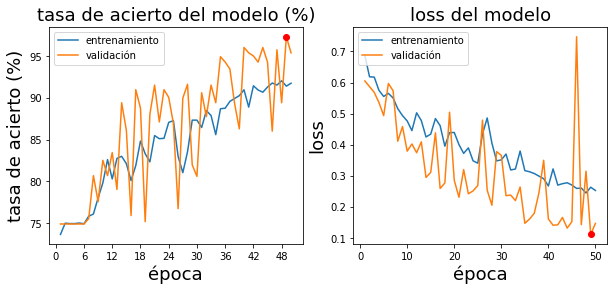

In [38]:
epochs = 50

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit(train_generator, 
                        steps_per_epoch=number_train_samples // batch_size,
                        epochs=1,
                        callbacks=callbacks_list,
                        verbose=1,
                        shuffle = False,
                        validation_data=validation_generator,
                        validation_steps=number_val_samples // batch_size
                       )
    
    if history.history['val_accuracy'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_accuracy'])
        print("saving weights")
        best_val_acc = history.history['val_accuracy'][-1]
    
    acum_tr_acc.append(history.history['accuracy'][0])
    acum_val_acc.append(history.history['val_accuracy'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [39]:
model = load_model(modelpath)

In [40]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

72/72 [==============================] - 32s 437ms/step - loss: 0.1653 - accuracy: 0.9524
Train loss    : 0.1652970016002655
Train accuracy: 0.9523601531982422

18/18 [==============================] - 5s 263ms/step - loss: 0.1116 - accuracy: 0.9729
Val loss    : 0.11156017333269119
Val accuracy: 0.9729021191596985

18/18 [==============================] - 4s 209ms/step - loss: 0.1158 - accuracy: 0.9773
Test loss     : 0.11584653705358505
Test accuracy : 0.9772727489471436


In [41]:
y_real = test_generator.classes
y_pred_proba = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [42]:
y_pred_proba[:5]

array([[9.9985635e-01, 1.4362903e-04],
       [1.0000000e+00, 1.0470464e-18],
       [9.8784220e-01, 1.2157761e-02],
       [9.8643839e-01, 1.3561602e-02],
       [9.9997067e-01, 2.9341800e-05]], dtype=float32)

In [43]:
test_generator.class_indices

{'bio': 0, 'obj': 1}

In [44]:
num2class = {test_generator.class_indices[x]:x  for x in test_generator.class_indices.keys()}
num2class

{0: 'bio', 1: 'obj'}

In [45]:
for clase in range(6):
    nombre_clase = num2class[clase]

    fpr, tpr, thresholds = roc_curve(y_real==clase, y_pred_proba[:,clase])
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.set_title(nombre_clase)
    ax1.legend()
    plt.show()

ValueError: ignored

In [46]:
test_datagen2 = ImageDataGenerator(dtype='float32')

test_generator2 = test_datagen2.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n,
    shuffle=False,
    class_mode='sparse')

Found 1144 images belonging to 2 classes.


In [47]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [48]:
def show_probs(probs):
    cadena = ""
    for i in range(len(num2class)):
        cadena = cadena + "{}: {}% ".format(num2class[i], int(100*probs[i]))
    print(cadena)

Clase real: bio


ValueError: ignored

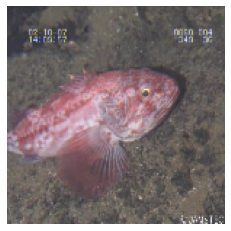

In [49]:
'''
ind_te1 = 1020 # 145

image = X_te[ind_te1].copy()

print("Clase real:", num2class[y_te[ind_te1]])
plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocesado(np.array([image])))[0]

show_probs(p)
'''

ind_te1 = 140

image = X_te[ind_te1].copy()

print("Clase real:", num2class[y_te[ind_te1]])
plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocesado(np.array([image])))[0]
cadena = ""
for i in range(len(num2class)):
    cadena = cadena + "{}: {}% ".format(num2class[i], int(100*p[i]))
print(cadena)

In [50]:
test_data_dir

'test'

In [51]:
# primero cargo a memoria los ejemplos de test:

test_datagen2 = ImageDataGenerator(dtype='float32',
                                   preprocessing_function = preprocesado)

test_generator2 = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n, # todas las imágenes del directorio test
    shuffle=False,
    class_mode='sparse') # binary: 0/1. Sparse: entero a partir de 0. Categorical: one hot

Found 1144 images belonging to 2 classes.


In [52]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [53]:
import tensorflow as tf
import cv2

def find_ind_last_conv2D(model):
    ind_last_conv2D_layer = None
    for i,x in enumerate(model.layers):
        if x.__class__.__name__ == "Conv2D":
            ind_last_conv2D_layer = i
    return ind_last_conv2D_layer


def show_heatmap(model, im):
    # im: imagen preprocesada por resnet ()
    # ver función _preprocess_numpy_input de
    # https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py

    # creo una versión de la imagen des preprocesada
    im2 = im.copy()
    im2[:,:,0] = im2[:,:,0] + 103.939
    im2[:,:,1] = im2[:,:,1] + 116.779
    im2[:,:,2] = im2[:,:,2] + 123.68
    im2 = im2 / 255
    im2 = im2[:,:,::-1]

    imag = np.expand_dims(im, axis=0) # de 1 imagen pasamos a 1 conjunto de 1 imagen
    probs = model.predict(imag)[0]
        
    # The is the output feature map of the last convolutional layer
    last_conv_layer = model.layers[find_ind_last_conv2D(model)]
    
    # This is the gradient of the "benign" class with regard to
    # the output feature map of last convolutional layer
    with tf.GradientTape() as tape:
        aux = model.output
        #aux = model.layers[-2].output # salida de la última capa densa antes de softmax

        iterate = tf.keras.models.Model([model.inputs], [aux, last_conv_layer.output])
        model_out, last_conv_layer = iterate(imag)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)

        # mean intensity of the gradient over a specific feature map channel:
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)    
    heatmap = np.maximum(heatmap, 0) # se quitan los negativos (se ponen a 0)
    heatmap /= np.max(heatmap) # se normaliza entre 0 y 1
    heatmap = heatmap[0] # pasamos de 1 conjunto de 1 heatmap a 1 heatmap
    
    # We use cv2 to load the original image
    #img = cv2.imread(img_path)
    img = imag[0]
    
    img = np.zeros((im.shape[0],im.shape[1],3))
#    print(im.shape, imag.shape)
    for i in range(3):
        img[:,:,i] = imag[0,:,:,0]

    
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    
    # We apply the heatmap to the original image
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) / 255
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_BONE) / 255
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT) / 255
    
    
    # 0.4 here is a heatmap intensity factor
    
    #superimposed_img = heatmap * 0.5 + 0.5*im

    superimposed_img = heatmap * 0.5 + 0.5*im2

    #print(heatmap.min(), heatmap.max(), heatmap.mean(), heatmap.std())
    #print(img.min(), img.max(), img.mean(), img.std())
    #print(superimposed_img.min(),  superimposed_img.max(),
    #      superimposed_img.mean(), superimposed_img.std())
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    #plt.imshow(im, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])

    plt.imshow(im2, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])

    plt.subplot(1,3,2)
    plt.imshow(heatmap, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.subplot(1,3,3)
    plt.imshow(superimposed_img, vmin=0, vmax=1); plt.xticks([]); plt.yticks([])
    plt.show()
    show_probs(probs)
    #print(np.shape(imag))
    ##prob = 100*model.predict(imag)[0][class_indices["female"]]
    ##print("Probabilidad clase female: {:2.1f}%".format(prob))
    ##prob = 100*model.predict(imag)[0][class_indices["male"]]
    ##print("Probabilidad clase male  : {:2.1f}%".format(prob))
    ##print("\n\n")
    return heatmap, superimposed_img

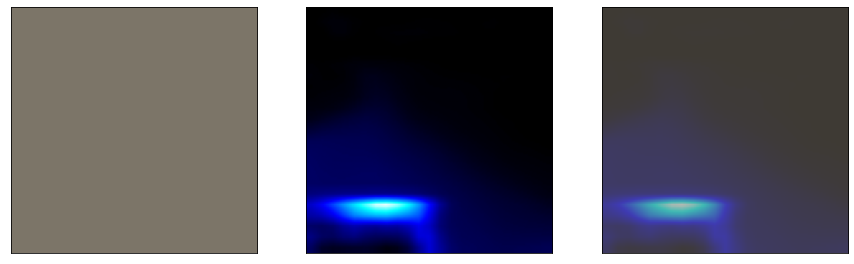

bio: 0% obj: 99% 
Real class: obj





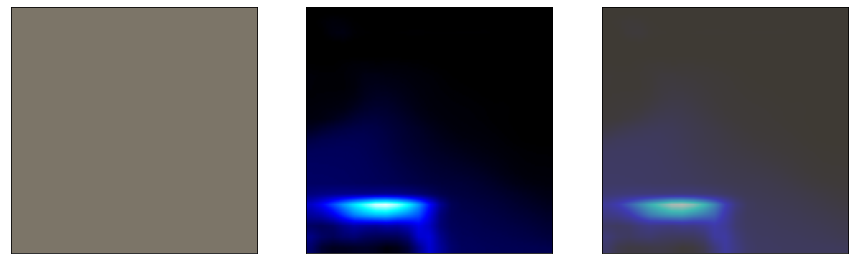

bio: 0% obj: 99% 
Real class: obj





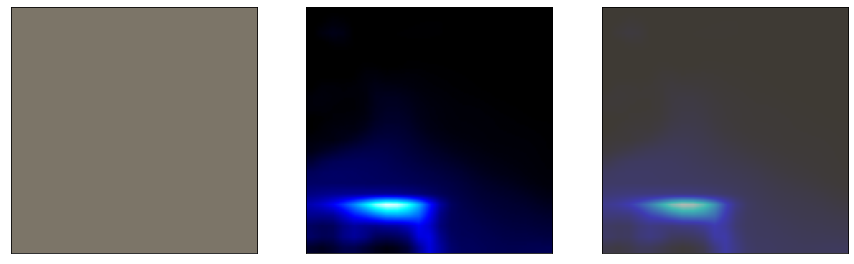

bio: 0% obj: 99% 
Real class: obj





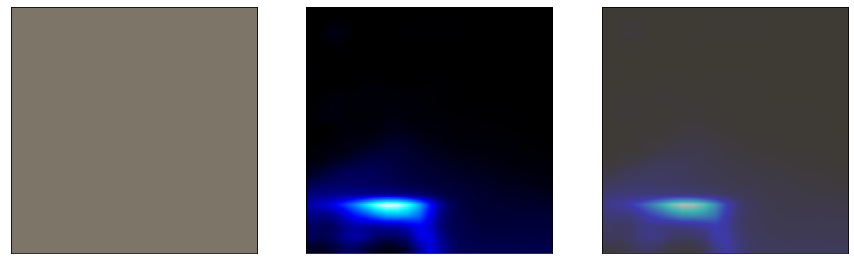

bio: 0% obj: 99% 
Real class: obj





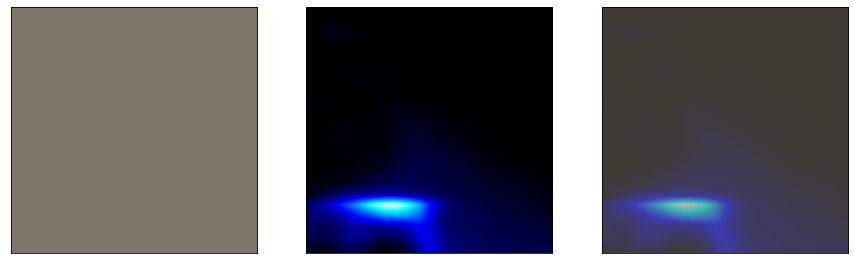

bio: 1% obj: 98% 
Real class: obj





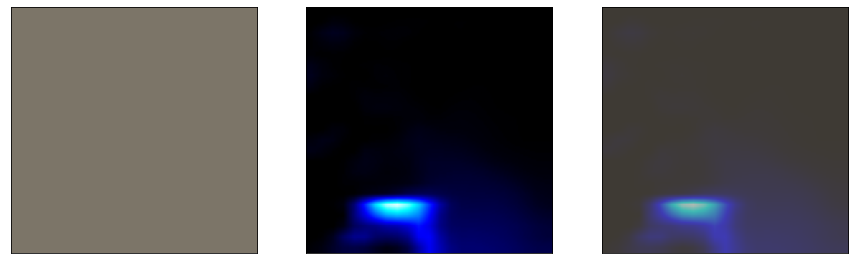

bio: 1% obj: 98% 
Real class: obj





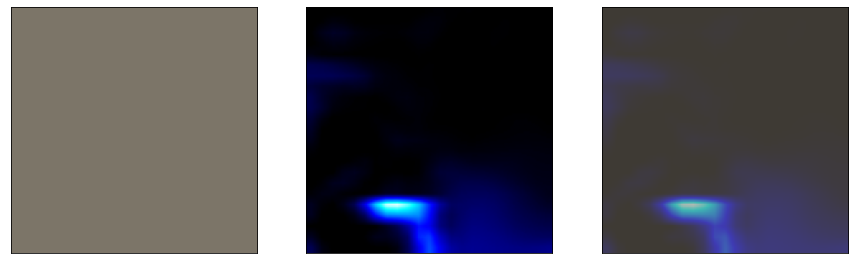

bio: 2% obj: 97% 
Real class: obj





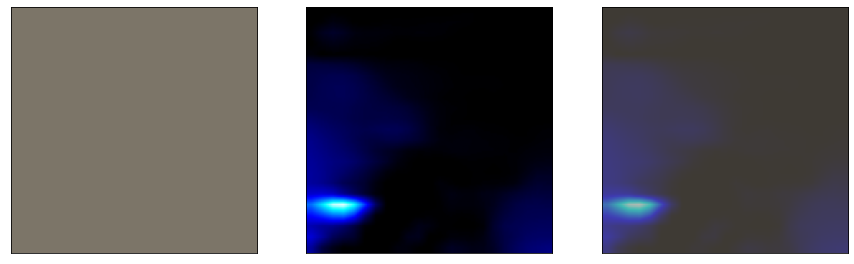

bio: 2% obj: 97% 
Real class: obj





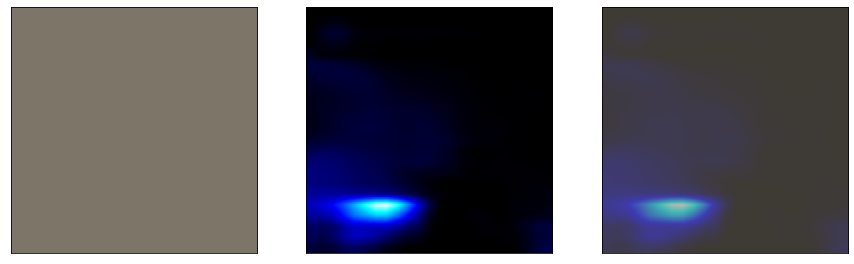

bio: 1% obj: 98% 
Real class: obj





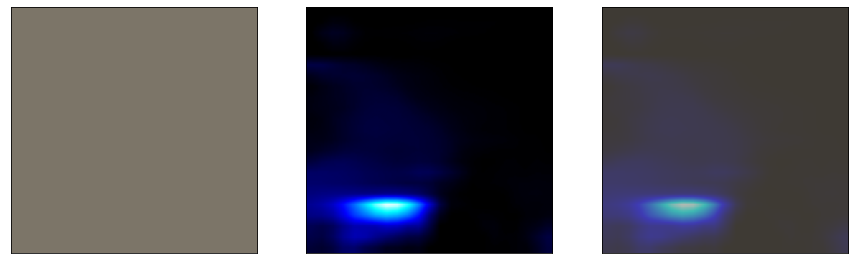

bio: 1% obj: 98% 
Real class: obj





In [54]:
#ind = 1041 
ind = 500

for i in range(ind, ind+10):
    show_heatmap(model, X_te[i])
    print("Real class:", num2class[y_te[i]])
    print("\n\n")

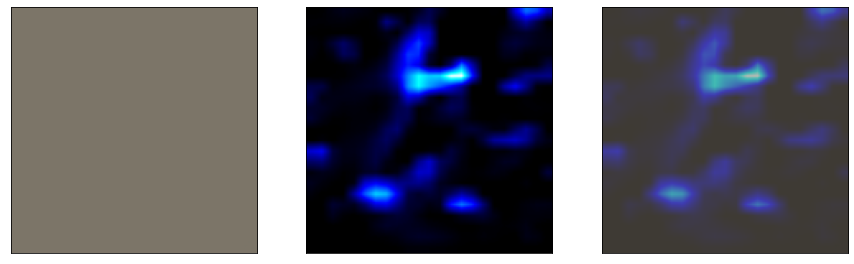

bio: 99% obj: 0% 
Real class: bio





In [55]:
show_heatmap(model, X_te[100])
print("Real class:", num2class[y_te[100]])
print("\n\n")

In [56]:
weights = model.get_weights()
print(np.shape(weights))
for i in range(len(weights)):
    print('shape of weights[%d]: ' % i, np.shape(weights[i]))

(16,)
shape of weights[0]:  (5, 5, 3, 32)
shape of weights[1]:  (32,)
shape of weights[2]:  (5, 5, 32, 32)
shape of weights[3]:  (32,)
shape of weights[4]:  (5, 5, 32, 32)
shape of weights[5]:  (32,)
shape of weights[6]:  (5, 5, 32, 32)
shape of weights[7]:  (32,)
shape of weights[8]:  (5, 5, 32, 32)
shape of weights[9]:  (32,)
shape of weights[10]:  (5, 5, 32, 32)
shape of weights[11]:  (32,)
shape of weights[12]:  (3872, 8)
shape of weights[13]:  (8,)
shape of weights[14]:  (8, 2)
shape of weights[15]:  (2,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


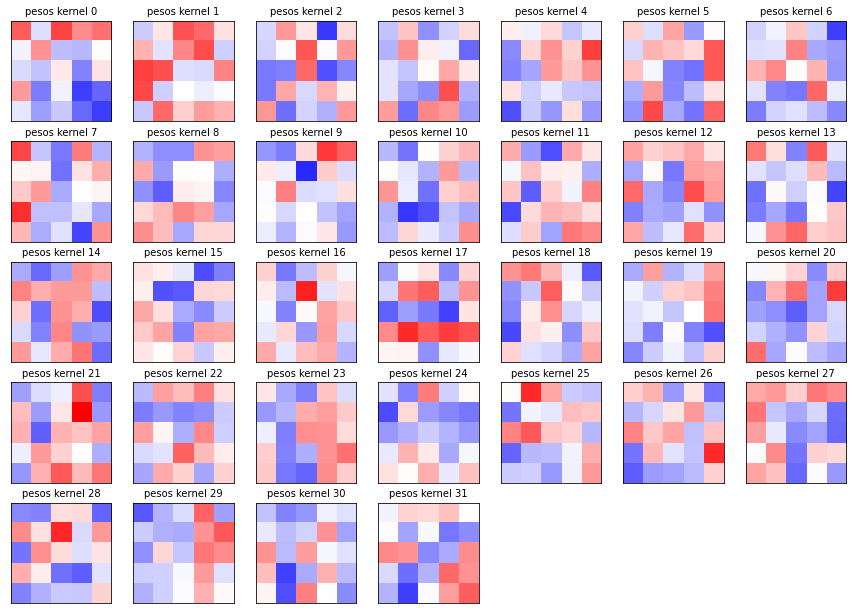

In [57]:
# kernels de la primera capa convolucional
ncapa = 0

nfilters = weights[ncapa].shape[3]
ncols = 7 # número de columnas en la figura

ma = abs(weights[ncapa]).max()
nrows = int(np.ceil(nfilters/ncols)) # número de filas en la figura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15*nrows/ncols))
axes_r = axes.ravel()
for i in range(nfilters):
    kernel = weights[ncapa][:,:,2,i]
    ax = axes_r[i]
    ax.imshow(kernel, vmin=-ma, vmax=ma, cmap='bwr')
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title('pesos kernel %d' % i, fontsize=10)
for i in range(nfilters,nrows*ncols):
    fig.delaxes(axes_r[i])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________





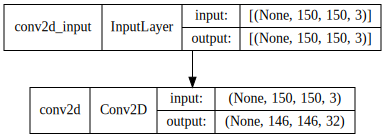

In [58]:
# salida de una sola capa
ncapa = 0
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[ncapa].output)
intermediate_layer_model.summary()
print("\n\n")
if COLAB:
    display(SVG(model_to_dot(intermediate_layer_model,show_shapes=True,dpi=72).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(intermediate_layer_model,show_shapes=True).create(prog='dot', format='svg')))

In [59]:
imagen = X_te[0]
imagen.shape

(150, 150, 3)

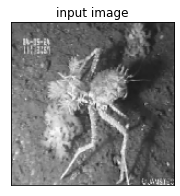

Salidas capa conv2d (1, 146, 146, 32)


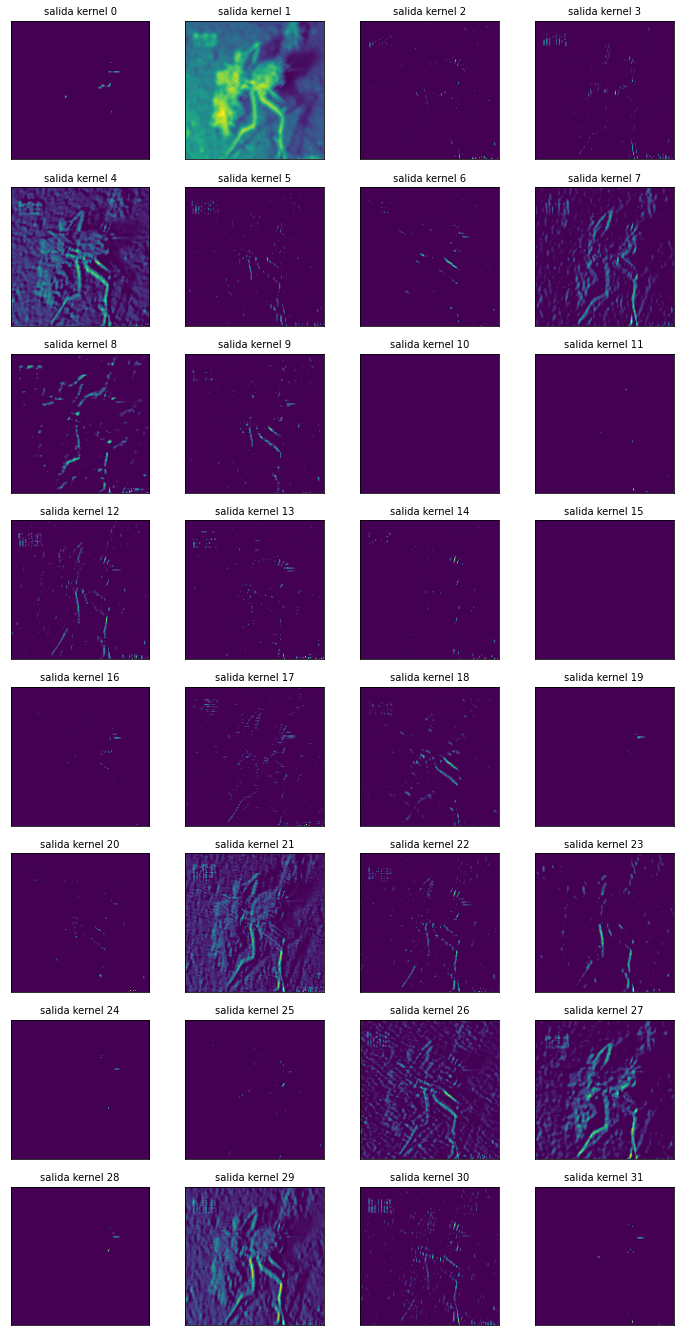

In [60]:
ejemplo = 10

imagen = X_te[ejemplo]
aux = np.expand_dims(imagen, axis=0)
salida_capa = intermediate_layer_model.predict(aux)

plt.figure(figsize=(3,3))
plt.imshow(imagen, cmap='gray')
plt.title('input image', size=12)
plt.xticks(())
plt.yticks(())
plt.show()

print("Salidas capa "+intermediate_layer_model.layers[-1].name, salida_capa.shape)

nsalidas = salida_capa.shape[-1]
ncols = 4
nrows = int(np.ceil(nsalidas / ncols))

ma = abs(salida_capa).max()

plt.subplots(nrows,ncols,figsize = (12, 3*nrows))

for i in range(nsalidas):
    plt.subplot(nrows,ncols,i+1)
#    plt.imshow(salida_capa[0,:,:,i], vmin=-ma, vmax=ma, cmap='bwr')
    plt.imshow(salida_capa[0,:,:,i], cmap='viridis')
    plt.xticks(())
    plt.yticks(())
    plt.title('salida kernel %d' % i, fontsize=10)

In [61]:
# Now we extract the outputs of the top 6 layers:
layer_outputs = [layer.output for layer in model.layers[:6]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(X_te[ejemplo:(ejemplo+1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


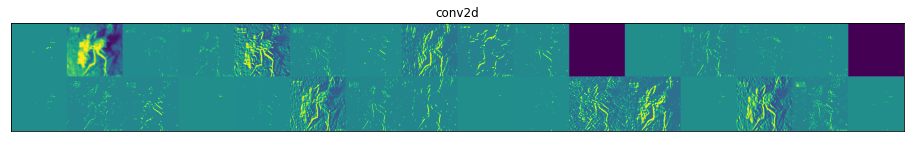

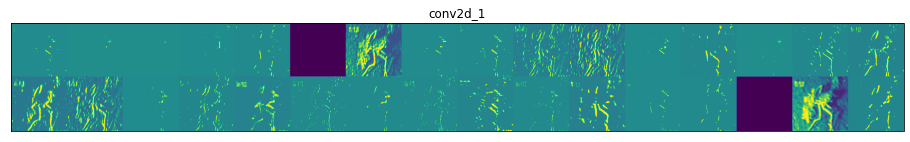

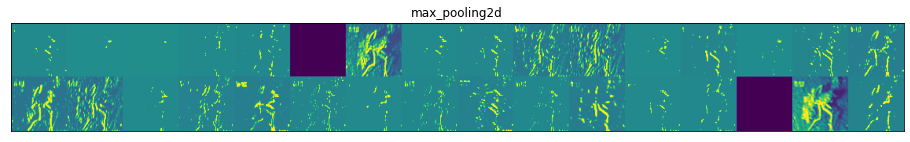

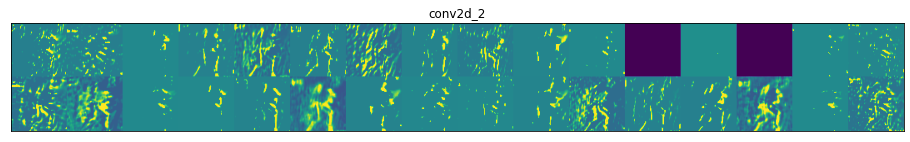

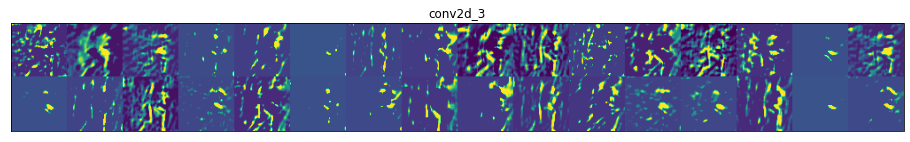

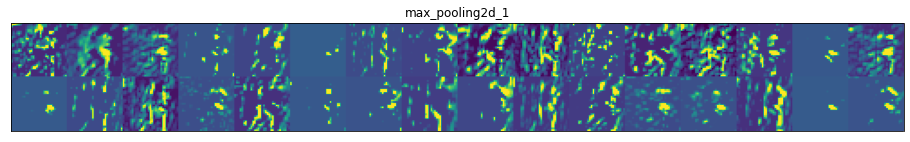

In [62]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(display_grid, aspect='auto', cmap='viridis')